<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:17: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dell\AppData\Local\Temp\ipykernel_10588\3711414894.py:13: SyntaxWarning: invalid escape sequence '\D'
  df_cus1 = pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_customers_d

C:\Users\dell\AppData\Local\Temp\ipykernel_10588\3711414894.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_12345678['review_score'].fillna(df_12345678['review_score'].mean(),inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_10588\3711414894.py:107: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_all['order_place_month']=pd.to_datetime(df_all['order_place_month'])


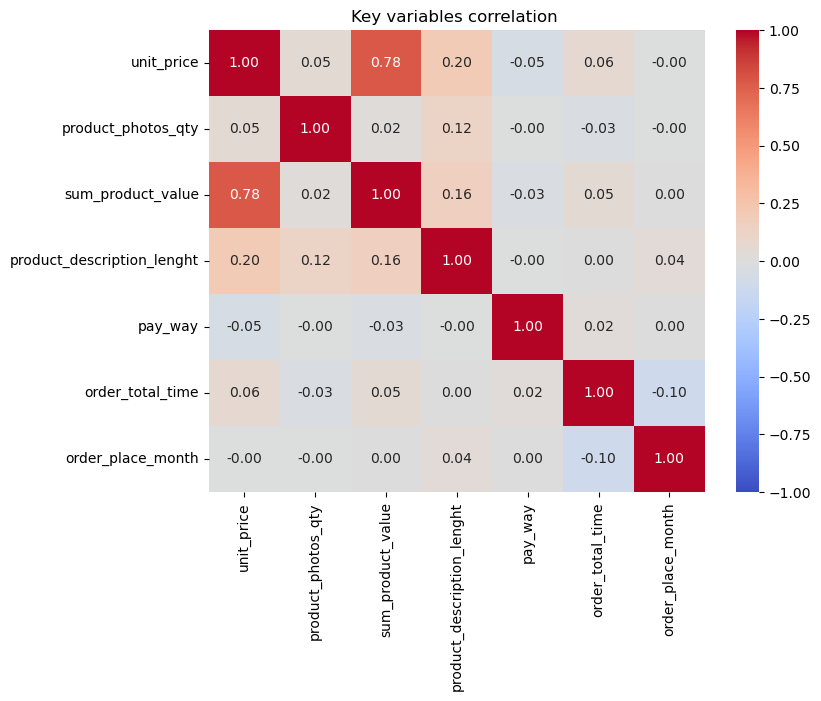

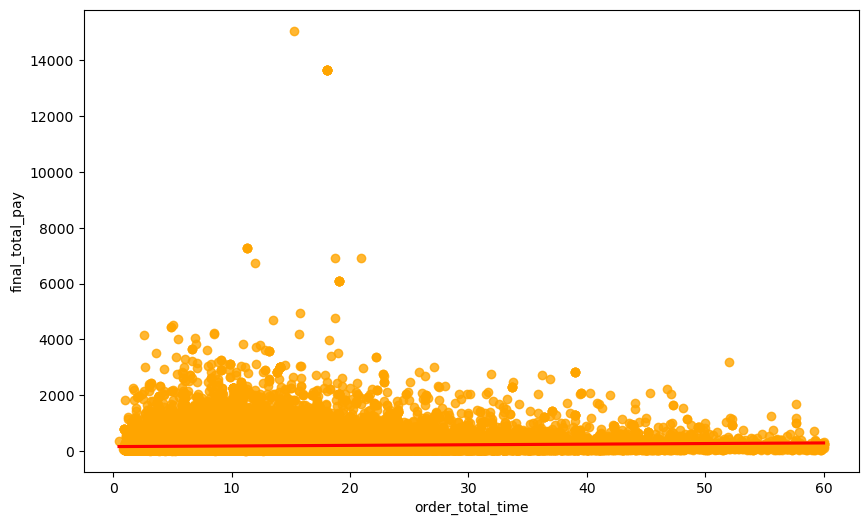

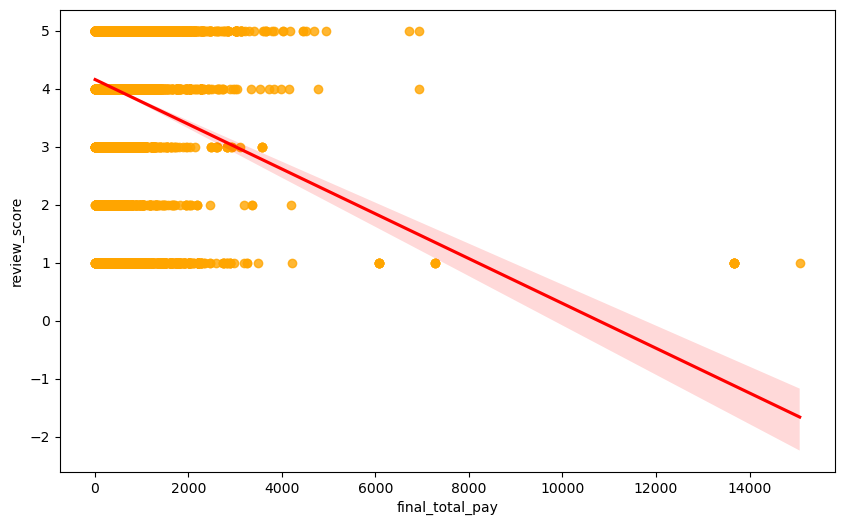

Group 1 K-S test result:0.35995380661450377,0.0
Group 2 K-S test result:0.4059357480159181,0.0
U_Statistic:1653455212.5
P_value:0.0
 hypothesis H1 is statistically rihgt that shorter shipping time bring customers obvious higher satisfaction on order service 
-----------------------
    df      mean  median
0  df1  4.257982     5.0
1  df2  3.927599     5.0


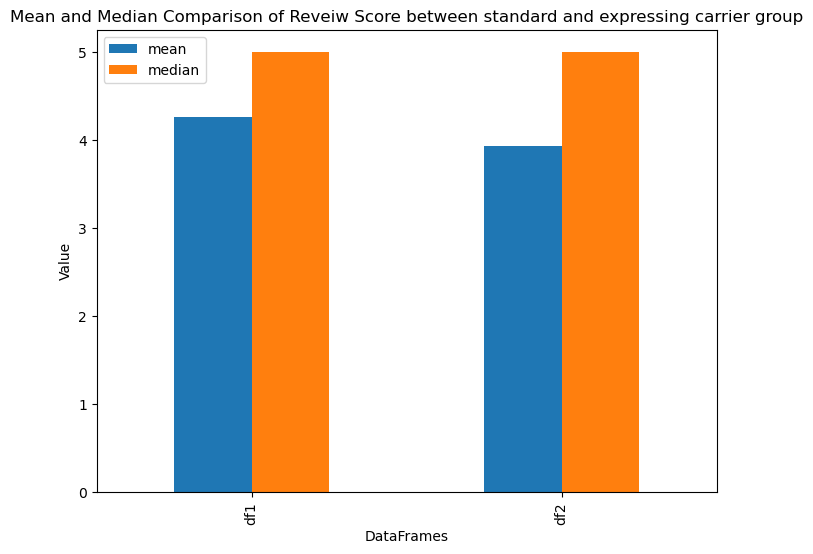

,product_description_lenght
count,108230.000000
mean,787.226924
std,651.282153
min,4.000000
25%,348.000000
50%,602.000000
75%,986.000000
max,3992.000000


In [37]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',100)

from IPython.display import display,HTML
display(HTML("<STYLE>.CONTAINER {width:100% !important; }</style>"))

              
df_cus1 = pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_customers_dataset.csv")
df_order_item2 = pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_order_items_dataset.csv")
df_order_pay3 = pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_order_payments_dataset.csv")
df_order_rev4 = pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_order_reviews_dataset.csv")
df_order_dataset5= pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_orders_dataset.csv")
df_product6= pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_products_dataset.csv")
df_seller7= pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\olist_sellers_dataset.csv")
df_translate8 = pd.read_csv("C:\\Users\\dell\Desktop\\最后项目\\product_category_name_translation.csv")

# rightly clean and merge all raw DataFrames:
df_23=pd.merge(df_order_item2,df_order_pay3,on='order_id',how='outer')
df_23.dropna(subset=['order_item_id','payment_type'],inplace=True) 
df_234 = pd.merge(df_23,df_order_rev4,on='order_id',how='outer')
df_234.dropna(subset=['product_id'],inplace=True)
df_2345 = pd.merge(df_234,df_order_dataset5, on='order_id',how='outer')
df_2345.dropna(subset=['product_id'],inplace=True)
df_23456 = pd.merge(df_2345,df_product6,on = 'product_id',how='outer')
df_23456.dropna(subset=['product_category_name'],inplace=True)
df_23456.dropna(subset=['product_length_cm'],inplace=True)
df_234567 = pd.merge(df_23456,df_seller7,on='seller_id',how='outer')
df_234567.dropna(subset=['product_category_name','product_id'],inplace=True) 
df_2345678=pd.merge(df_234567,df_translate8,on='product_category_name',how='outer')
df_2345678.dropna(subset=['product_category_name_english'],inplace=True)
df_12345678 = pd.merge(df_2345678,df_cus1,on='customer_id',how='outer')
df_12345678.dropna(subset=['order_id'],inplace=True)
df_12345678.dropna(subset=['order_approved_at'],inplace=True)
df_12345678['review_score'].fillna(df_12345678['review_score'].mean(),inplace=True)
df_all=df_12345678

# transfer columns into right format
df_all['shipping_limit_date']=pd.to_datetime(df_all['shipping_limit_date'])
df_all['review_creation_date']=pd.to_datetime(df_all['review_creation_date'])
df_all['review_answer_timestamp']=pd.to_datetime(df_all['review_answer_timestamp'])
df_all['order_purchase_timestamp']=pd.to_datetime(df_all['order_purchase_timestamp'])
df_all['order_approved_at']=pd.to_datetime(df_all['order_approved_at'])
df_all['order_delivered_carrier_date']=pd.to_datetime(df_all['order_delivered_carrier_date'])
df_all['order_delivered_customer_date']=pd.to_datetime(df_all['order_delivered_customer_date'])
df_all['order_estimated_delivery_date']=pd.to_datetime(df_all['order_estimated_delivery_date'])

df_all['order_item_id']= df_all['order_item_id'].astype(int)
df_all['payment_sequential']= df_all['payment_sequential'].astype(int)
df_all['payment_installments']= df_all['payment_installments'].astype(int)
df_all['review_score']= df_all['review_score'].astype(int)
df_all['product_description_lenght']= df_all['product_description_lenght'].astype(int)
df_all['product_photos_qty']= df_all['product_photos_qty'].astype(int)

# remove all useless columns infos 
df_all.drop(columns=['customer_zip_code_prefix','customer_unique_id','seller_zip_code_prefix','product_length_cm','product_height_cm','product_width_cm'],inplace=True)
df_all.drop(columns=['product_name_lenght','product_category_name','review_comment_title','review_comment_message'],inplace=True)


# rename vague columns name
df_all.rename(columns={'price':'product_price'},inplace=True)
df_all.rename(columns={'payment_value':'total_pay'},inplace=True)


# rectify payment columns to make total payment value 99.4% close to original file rather than prevous almost 22.5% gap
df_all['product_qty'] = 1
df_all = df_all.sort_values(by=['order_id','order_item_id'])
df_all=df_all.drop_duplicates(subset=['order_id','order_item_id'],keep='first')
df_all['product_qty']=df_all.groupby('order_id')['order_item_id'].transform('max')
df_all['sum_product_price']=df_all['product_price']*df_all['product_qty']
df_all['sum_freight']=df_all['freight_value']*df_all['product_qty']
df_all['final_total_pay']=df_all['sum_product_price'] + df_all['sum_freight']
df_all.drop(columns=['order_item_id','freight_value','total_pay'],inplace=True)
df_all.rename(columns={'product_price':'unit_price'},inplace=True)
df_all.rename(columns={'sum_product_price':'sum_product_value'},inplace=True)

payment_mapping = {
    'credit_card':1,
    'boleto':2,
    'voucher':3,
    'debit_card':4
}
df_all['pay_way']=df_all['payment_type'].map(payment_mapping)

# calculate all relative times(hour) spend per process
df_all['order_total_time']=(df_all['order_delivered_customer_date'] - df_all['order_purchase_timestamp']).dt.total_seconds()/86400
df_all['order_total_time'] = df_all['order_total_time'].round(1)
df_all['order_seller_cfm_time']=(df_all['order_approved_at'] - df_all['order_purchase_timestamp']).dt.total_seconds()/86400
df_all['order_seller_cfm_time']=df_all['order_seller_cfm_time'].round(2)
df_all['order_cfm_carrier_get_t']=(df_all['order_delivered_carrier_date'] - df_all['order_approved_at']).dt.total_seconds()/86400
df_all['order_cfm_carrier_get_t']=df_all['order_cfm_carrier_get_t'].round(2)
df_all['order_carrier_shipping_t']=(df_all['order_delivered_customer_date'] - df_all['order_delivered_carrier_date']).dt.total_seconds()/86400
df_all['order_carrier_shipping_t']=df_all['order_carrier_shipping_t'].round(2)
df_all.to_csv('df_final9.csv',index=False)
df_all.loc[df_all['order_cfm_carrier_get_t']<0,'order_cfm_carrier_get_t'] =0


# remove those extreme value rows which only totally removed 0.3% of total data
df_all = df_all[df_all['order_total_time']<=60]
df_all = df_all[df_all['order_carrier_shipping_t']>0]
df_all = df_all[df_all['order_carrier_shipping_t']<60]
df_all['order_place_month'] = df_all['order_purchase_timestamp'].dt.strftime('%Y.%m')
df_all['order_place_month']=pd.to_datetime(df_all['order_place_month'])
df_all.to_csv('df_all_22.csv',index=False)

# # Descriptive Statistics:
df_all[['unit_price','product_qty','sum_product_value','review_score','sum_freight','order_total_time','order_purchase_timestamp']].describe()
df_all[['order_purchase_timestamp','order_seller_cfm_time','order_cfm_carrier_get_t','order_carrier_shipping_t','order_total_time']].describe()

# transfer customer States
state_mapping = {
    'SP':'Sao Paulo',
    'RJ':'Rio de Janeiro',
	'MG':'Minas Gerais',
	'RS':'Rio Grande do Sul',
	'PR':'Parana',
	'SC':'Santa Catarina',
	'BA':'Bahia',
	'DF':'Federal District',
	'GO':'Goias',
	'ES':'Espirito Santo',
	'PE':'Pernambuco',
	'CE':'Ceara',
	'PA':'Para',
	'MT':'Mato Grosso',
	'MS':'Mato Grosso do Sul',
	'MA':'Maranhao',
	'PB':'Paraiba',
	'PI':'Piaui',
	'RN':'Rio Grande do Norte',
	'AL':'Alagoas',
	'SE':'Sergipe',
	'TO':'Tocantins',
	'RO':'Rondonia',
	'AM':'Amazonas',
	'AC':'Acre',
	'AP':'Amapa',
	'RR':'Roraima'
}
df_all['customer_full_state']=df_all['customer_state'].map(state_mapping)
df_all.to_csv('df_all_24.csv',index=False)

# Explore correlations between key variables
targeted_columns = ['unit_price','product_photos_qty','sum_product_value','product_description_lenght','pay_way','order_total_time','order_place_month']
correlation_matrix = df_all[targeted_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1,fmt=".2f")
plt.title('Key variables correlation ')
plt.show()

# checking correlation on Order Price vs. Shipping Time:
plt.figure(figsize=(10,6))
sns.regplot(x='order_total_time',y='final_total_pay',data=df_all,scatter_kws={'color':'orange'},line_kws={'color':'red'})
plt.xlabel('order_total_time')
plt.ylabel('final_total_pay')
plt.show()

# checking correlation on Order Price vs. Customer Satisfaction Rating:
plt.figure(figsize=(10,6))
sns.regplot(x='final_total_pay',y='review_score',data=df_all,scatter_kws={'color':'orange'},line_kws={'color':'red'})
plt.xlabel('final_total_pay')
plt.ylabel('review_score')
plt.show()



## Hypothesis Testing (A/B Testing):
#(H0): There is no difference in customer satisfaction between orders with standard shipping and orders with express shipping.
#(H1): Orders with express shipping have higher customer satisfaction compared to orders with standard shipping.

## Divide the dataset into control and treatment groups( if shipping time <=7 (day))
from scipy.stats import kstest,norm
df1 = df_all[df_all['order_carrier_shipping_t']<=7]
df2 = df_all[df_all['order_carrier_shipping_t']>7]


ks_statistic_1,p_value_1 = kstest(df1['review_score'],'norm',args=(df1['review_score'].mean(), df1['review_score'].std()))
print(f"Group 1 K-S test result:{ks_statistic_1},{p_value_1}")
                                
ks_statistic_2,p_value_2 = kstest(df1['review_score'],'norm',args=(df2['review_score'].mean(), df2['review_score'].std()))
print(f"Group 2 K-S test result:{ks_statistic_2},{p_value_2}")
                                
# both P value in above 2 group(df1 and df2) are lower than 0.01 means they are not normal distributed in review_score columns
# we use more suitable below test to further test our above hypothesis
# print("-----------------------")
from scipy.stats import mannwhitneyu

satisfaction_df1= df1['review_score']
satisfaction_df2= df2['review_score']
stat,p_value = mannwhitneyu(satisfaction_df1,satisfaction_df2,alternative='greater')

print(f"U_Statistic:{stat}")
print(f"P_value:{p_value}")

if p_value < 0.05:
    print(" hypothesis H1 is statistically rihgt that shorter shipping time bring customers obvious higher satisfaction on order service ")
else:
    print(" hypothesis H0 is right")

print("-----------------------")
df1_stats={
    'df':'df1',
    'mean':df1['review_score'].mean(),
    'median':df1['review_score'].median()}
df2_stats={
    'df':'df2',
    'mean':df2['review_score'].mean(),
    'median':df2['review_score'].median()}
compare_df=pd.DataFrame([df1_stats,df2_stats])
print(compare_df)

compare_df.set_index('df')[['mean','median']].plot(kind='bar',figsize=(8,6))
plt.title("Mean and Median Comparison of Reveiw Score between standard and expressing carrier group")
plt.ylabel("Value")
plt.xlabel("DataFrames")
plt.show()


df_all[['product_description_lenght']].describe()
